# Clase 5 A01275868 Pablo Franklin
# Gráficas de violin

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
df=pd.read_csv('Dataset_olympics.csv')

In [6]:
df.dropna(subset=['Age', 'Weight', 'Height'], inplace= True)
df['Medal'].fillna(value="NA", inplace=True)

<Axes: xlabel='Weight', ylabel='Count'>

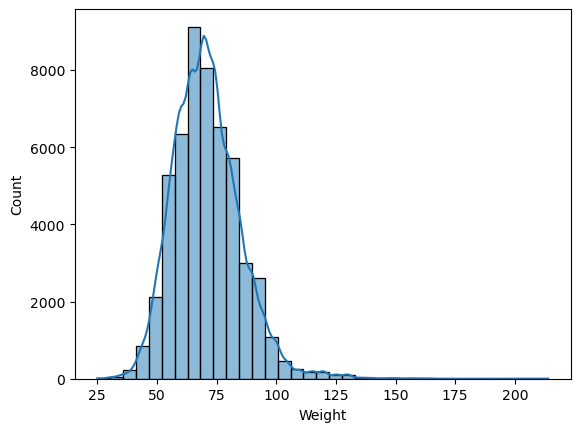

In [7]:
sb.histplot(df['Weight'],bins=35, kde=True)

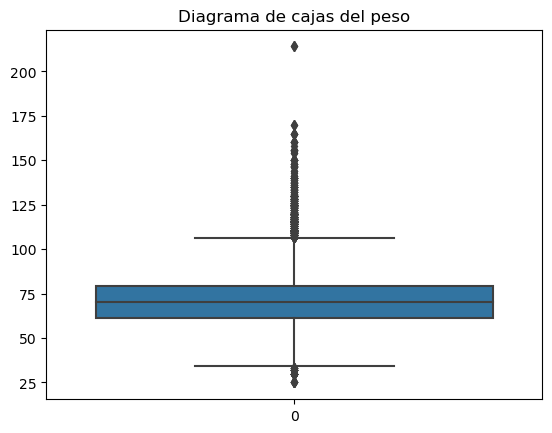

In [17]:
sb.boxplot(data=df['Weight']).set_title("Diagrama de cajas del peso")
plt.show()

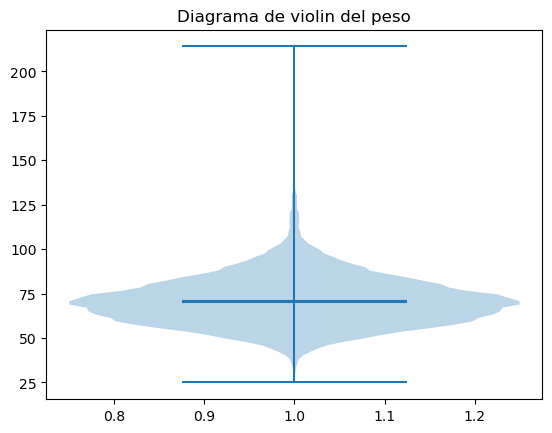

In [20]:
fig, ax= plt.subplots()
ax.violinplot(df["Weight"],showmeans=True, showmedians=True)
plt.title("Diagrama de violin del peso")

plt.show()

Text(0.5, 1.0, 'Gráfico')

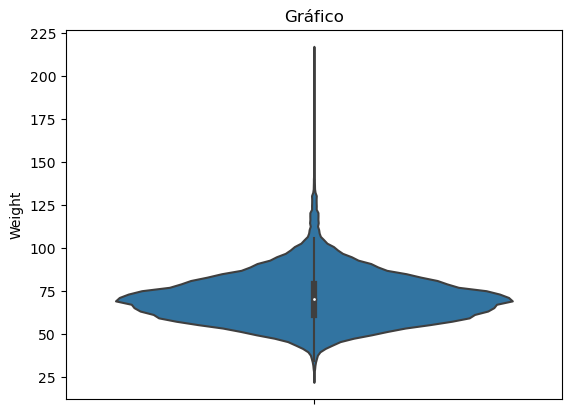

In [23]:
sb.violinplot(y=df['Weight']).set_title("Gráfico")

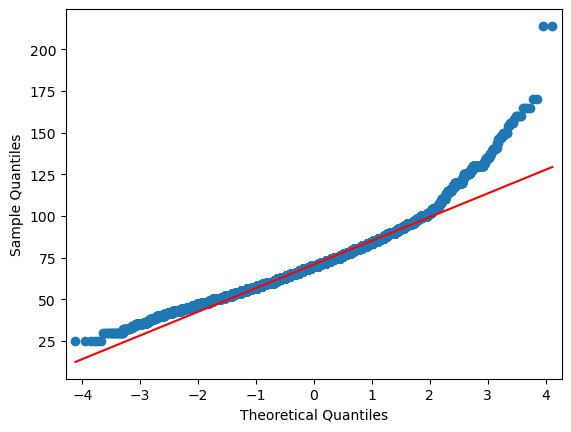

In [28]:
sm.qqplot(df["Weight"],line='s')
plt.show()

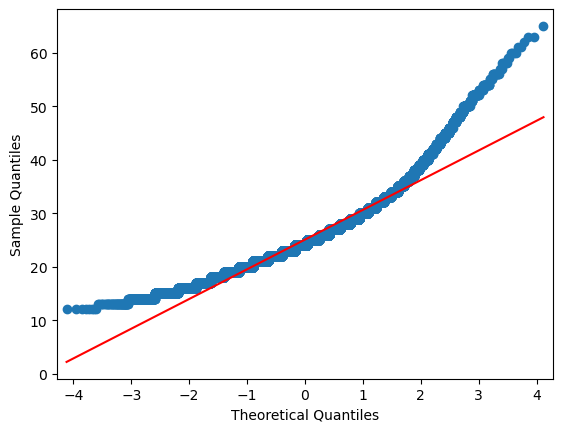

In [27]:
sm.qqplot(df['Age'], line='s')
plt.show()

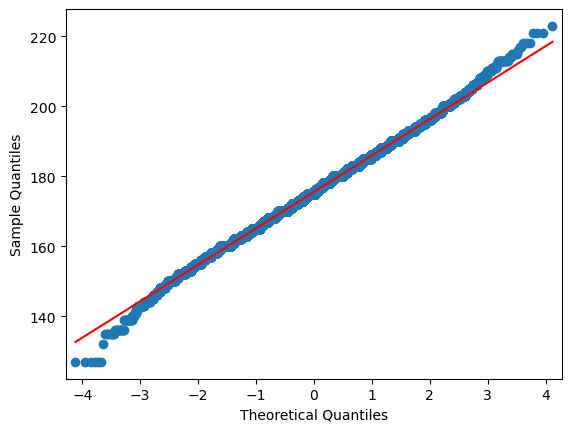

In [29]:
sm.qqplot(df['Height'], line='s')
plt.show()

In [30]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [49]:
shapiro(df['Height'])

C:\Users\GAMER\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9983671307563782, pvalue=6.530387977972458e-22)

In [33]:
normaltest(df['Height'])

NormaltestResult(statistic=73.37562368960579, pvalue=1.1659656678378008e-16)

In [41]:
z= np.abs(stats.zscore(df['Age']))
df2=df[(z<3)]
print(df.shape)
print(df2.shape)

(52266, 15)
(51544, 15)


In [48]:
q1= df['Height'].quantile(0.25)
q3= df['Height'].quantile(0.75)
IQR= df['Height'].apply(stats.iqr)

df3= df [~ ((df["Height"]< q1-1.5*IQR)|(df['Height']>(q3+1.5*IQR)))]

df3.shape

(27905, 15)